In [1]:
#Import all packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statistics
from scipy import stats

import sklearn
from sklearn import  preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load the data set into Pandas
df = pd.read_csv('churn_prepared.csv', index_col = 0)
df.describe()

,MonthlyCharge,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,Bandwidth_GB_Year,Churn_num,Tablet_num,...,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,StreamingTV_num,StreamingMovies_num,Port_modem_num,One year,Two Year,Fiber Optic,None
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,172.624816,2.0877,53.078400,39806.926771,10.001848,0.398000,34.526188,3392.341550,0.265000,0.299100,...,0.357600,0.450600,0.438600,0.492900,0.489000,0.483400,0.210200,0.244200,0.440800,0.212900
std,42.943094,2.1472,20.698882,28199.916702,2.976019,0.635953,26.443063,2185.294852,0.441355,0.457887,...,0.479317,0.497579,0.496241,0.499975,0.499904,0.499749,0.407471,0.429633,0.496508,0.409378
min,79.978860,0.0000,18.000000,348.670000,0.099747,0.000000,1.000259,155.506715,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139.979239,0.0000,35.000000,19224.717500,8.018214,0.000000,7.917694,1236.470827,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.484700,1.0000,53.000000,33170.605000,10.018560,0.000000,35.430507,3279.536903,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,200.734725,3.0000,71.000000,53246.170000,11.969485,1.000000,61.479795,5586.141370,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,290.160419,10.0000,89.000000,258900.700000,21.207230,6.000000,71.999280,7158.981530,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MonthlyCharge         10000 non-null  float64
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Yearly_equip_failure  10000 non-null  int64  
 6   Tenure                10000 non-null  float64
 7   Bandwidth_GB_Year     10000 non-null  float64
 8   Churn_num             10000 non-null  int64  
 9   Tablet_num            10000 non-null  int64  
 10  Phone_num             10000 non-null  int64  
 11  Multiple_num          10000 non-null  int64  
 12  OnlineSecurity_num    10000 non-null  int64  
 13  OnlineBackup_num      10000 non-null  int64  
 14  DeviceProtection_num  10000 non-null  int64  
 15  StreamingTV_num     

In [4]:
#Prepare data [5][6]
feature = ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year', 'Churn_num', 'Tablet_num',
           'Phone_num', 'Multiple_num', 'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num', 'StreamingTV_num', 'StreamingMovies_num',
           'Port_modem_num', 'One year', 'Two Year', 'Fiber Optic', 'None']
X = df[feature]
y = df['MonthlyCharge']
X = sm.add_constant(X)

In [5]:
#Create model [6]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     9985.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:22:51   Log-Likelihood:                -36329.
No. Observations:               10000   AIC:                         7.270e+04
Df Residuals:                    9978   BIC:                         7.286e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.6978 

<AxesSubplot:>

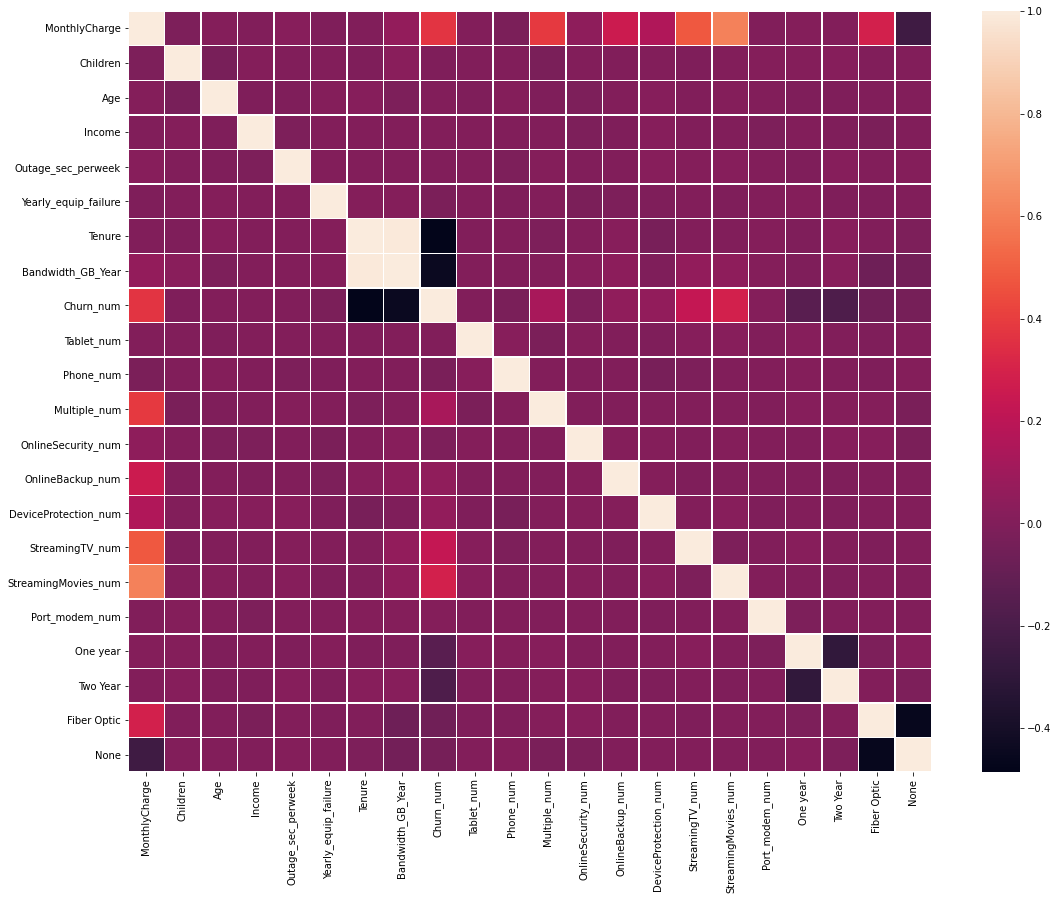

In [6]:
#For variable selection, use a seaborn heatmap to see correlation between the columns [1][2]
plt.figure(figsize = (18, 14))
sns.heatmap(df.corr(), linewidth = 0.5)
#plt.savefig('heatmap3.jpg')

In [7]:
#Re-prepare the data [5][6]
#Variable selection based on p-values and heatmap
feature2 = ['Churn_num', 'Multiple_num', 'OnlineBackup_num', 'DeviceProtection_num', 'StreamingTV_num', 'StreamingMovies_num', 'Fiber Optic', 'None']
X2 = df[feature2]
y = df['MonthlyCharge']
X2 = sm.add_constant(X2)

In [8]:
#Run reduced model [6]
reduced_model = sm.OLS(y, X2).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.878e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:23:39   Log-Likelihood:                -37913.
No. Observations:               10000   AIC:                         7.584e+04
Df Residuals:                    9991   BIC:                         7.591e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   89.9134 

In [9]:
y_pred = reduced_model.predict(X2)
residuals = y - y_pred

C:\Users\jphun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


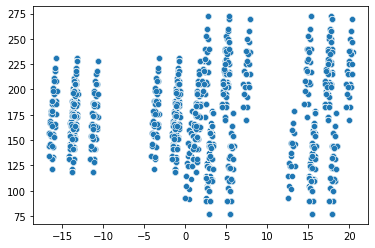

In [10]:
sns.scatterplot(residuals, y_pred)
plt.show()